## Range

_Range is the _`(maximum - minumum)`_ of a set, it represents how "wide" our data is._ 

In [78]:
_range = lambda *l: max(l) - min(l)

print _range(1,2), _range(1,3), _range(0, 9) #etc

1 2 9


#### Find the _range_ of _S_ where _S_ = `{65, 81, 73, 85, 94, 79, 67, 83, 82}`

In [79]:
S = {65, 81, 73, 85, 94, 79, 67, 83, 82}
print "Range of S: %s" % _range(*S)

Range of S: 29


## Mid-Range
_The Mid-Range is the average _(arithmetic mean)_ of the largest number and the smallest number_

In [80]:
midrange = lambda *a: ((max(a) + min(a)) / 2.0)

#### Find the _Mid-Range_ of _S_:

In [81]:
print "Mid-Range of S: %s" % midrange(*S)

Mid-Range of S: 79.5


## Interquartile Range (IQR)

_Quartiles_ divide an ordered dataset into four equal parts, and refer to the values of the point between the quarters.

The _Interquartile Range_ describes the middle 50% of values when ordered from lowest to highest. This helps us figure out the difference between the middle of the first half, and the middle of the second half.

Lets say we have the following set S, representing the number of animal crackers in each child's lunchbox at our local elementary school:

```
S = {6, 12, 10, 11, 15, 7, 14, 4, 4}
```

Plotted on a frequency graph this may look like:

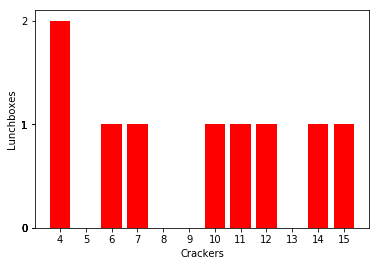

In [82]:
import numpy as np
import matplotlib.pyplot as plt

def create_freqbar_chart(S2, color, title="", ylabel="Lunchboxes", xlabel="Crackers"):
    x2 = range(min(S2), max(S2) + 1)
    y2 = ([S2.count(y) for y in x2])
    plt.bar(x2, y2, color=color)
    plt.ylabel(ylabel)
    plt.yticks(y2)
    plt.xticks(x2)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.show()

S = [ 6, 12, 10, 11, 15, 7, 14, 4, 4 ]
create_freqbar_chart(S, [1,0,0,1])



To find the IQR, we first need to sort the numbers and find the median:
```
{ 4, 4, 6, 7, (10 median), 11, 12, 14, 15}
```

In [83]:
import numpy
def median(lst):
    return numpy.median(numpy.array(lst))

S = sorted([4, 4, 10, 11, 15, 7, 14, 12, 6])
s_median = int(median(S))

print("Median for %s is %s" % (S, s_median))

Median for [4, 4, 6, 7, 10, 11, 12, 14, 15] is 10


Since the IQR is the _difference between the two halves_, we split the set by the median and calculate each subset's medians, and then subtract the result.

```
Su =  median({ 4, 4, 6, 7 }) => 13
                -
St = median({ 11, 12, 14, 15 }) => 5
```

```IQR = 13 - 5 = 8```

In [84]:
# Calculating S's IQR where len(S) is odd
Su = S[S.index(s_median) + 1:]
St = S[:S.index(s_median)] 
su_median, st_median = median(Su), median(St)

print "IQR: %i " % (su_median - st_median)

IQR: 8 


Lets try another example:

We have the following set S, representing the number of songs in each album of a collection:

```
S = [7,9,9,10,10,10,11,12,12,14]
```

One interesting thing about _S_ is that it has an even number of data points. In our last example we had to split by the odd number and omit the data point from `Su` and `St`. This time, since we have two data points in the middle, we can calculate the arithmetic mean of them and include them in each bucket.

In [85]:
# Calculating S's IQR where len(S) is even
S = sorted([7,9,9,10,10,10,11,12,12,14])
Su = S[len(S) / 2:]
St = S[:len(S) / 2]
su_median, st_median = median(Su), median(St)

print "IQR: %i " % (su_median - st_median)

IQR: 3 


In [86]:
def iqr(*l):
    """ Naive implementation of iqr
    """
    S = sorted(l)
    if (len(S) % 2 == 0):
        # Split the dataset into two buckets (each containing 2 quartiles)
        Su = S[len(S) / 2:]
        St = S[:len(S) / 2]
    else:
        s_median = median(l)
        # Split by the median and omit it
        Su = S[S.index(s_median) + 1:]
        St = S[:S.index(s_median)]
        
    # Find the median of each bucket (median(q1, q2), median(q3, q4))
    su_median, st_median = median(Su), median(St)
    return (su_median - st_median)

print iqr(7,9,9,10,10,10,1,12,12,14), iqr(4, 4, 10, 11, 15, 7, 14, 12, 6)

3.0 8.0


## Mean Absolute Deviation
_Mean absolute deviation_ (MAD) of a data set is the average distance between each data value and the mean. Mean absolute deviation is a way to describe variation in a data set. Mean absolute deviation helps us get a sense of how "spread out" the values in a data set are.


For example, say we have two sets of data:

```
S1 = 2,2,4,4
S2 = 1,1,6,4
```

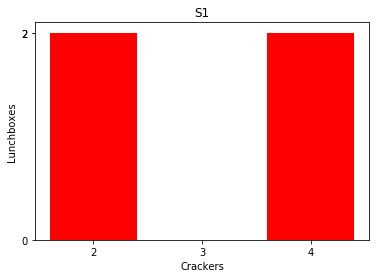

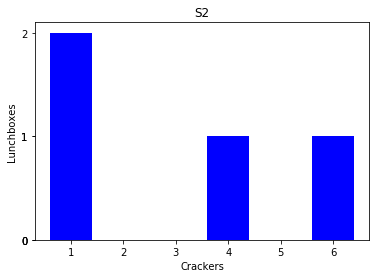

In [87]:
S1 = [2,2,4,4]
S2 = [1,1,6,4]
red, blue = [1, 0, 0, 1], [0, 0, 1, 1]

create_freqbar_chart(S1, red, "S1")
create_freqbar_chart(S2, blue, "S2")

How would we find a good measure of center for these two data sets? 

Well we could try the arithmetic mean of each set:

In [88]:
mean = lambda *l: sum(l) / len(l)
S1_mean = mean(2,2,4,4)
S2_mean = mean(1,1,6,4)

S1_mean, S2_mean

(3, 3)

But upon looking at the visualization there's something about these two datasets that "feel" a little bit different, Something the aritimetic mean doesn't quite capture. The means are the same, but the datasets look different. 

Some examples of deviations not captured by the mean:
- `S2` has a much larger range than `S1`
- `S1` has no skew, it is symmetrical, whereas `S2` has a right-facing tail
- `S2` has more values away from the mean (3) than `S1` on average

This is an interesting question we ask ourselves in statistics. We do not always want a measure of _center_, like the arithimetic mean. We may also want a measure of _variability_.

### Calculating Variability with MAD
So what _is_ variabilty? One way to think about variability is:
_"On average, how far are each of the datapoints from the mean?"_

Continuing our example with `S1` and `S2`: 
- We need to go through each datapoint in each set and calculate the _absolute deviation_ from the mean. (The D in MAD).
- We then sum those distances and divide by the number of datapoints (the M in MAD) 
- and finally recieve our average (A in MAD).

For example, we can compute the variability of S1 like so:
```
|2-3| + |2-3| + |4-3| + |4-3|
------------------------------
              4
```

Or in python:

In [89]:
S2_variability = sum([abs(x - median(S2)) for x in S2 ]) / len(S2)
print S2_variability

2.0


The process of calculating variability like so is "Mean Absolute Deviation"

In [90]:
mad = lambda *l: sum([abs(x - median(l)) for x in l ]) / len(l)

In [98]:
print ("Variability of S1: %s\n" +
       "Variability of S2: %s") % (mad(*S1), mad(*S2))

Variability of S1: 1.0
Variability of S2: 2.0


As we can see, 1.0, 2.0 much better represents the variability in the data than 3, 3